In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
iris_df = pd.DataFrame(load_iris()['data'], columns=load_iris()['feature_names'])

In [7]:
iris_df['target'] = load_iris()['target']

In [8]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

/tmp/ipykernel_6142/3977585284.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0, 0.5, 'sepal width')

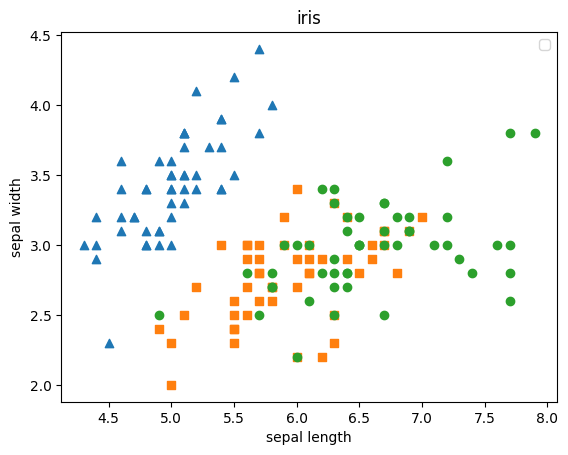

In [18]:
for i ,marker in enumerate(['^','s','o']):
    x_xis = iris_df[iris_df['target'] == i]['sepal length (cm)']
    y_axis = iris_df[iris_df['target'] == i]['sepal width (cm)']
    plt.scatter(x_xis, y_axis, marker=marker)
plt.legend()
plt.title('iris')
plt.xlabel("sepal length")
plt.ylabel("sepal width")

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
iris_df_scaled = StandardScaler().fit_transform(iris_df)

In [21]:
pca = PCA(n_components=2,)
pca.fit(iris_df_scaled)
iris_pca = pca.transform(iris_df_scaled)

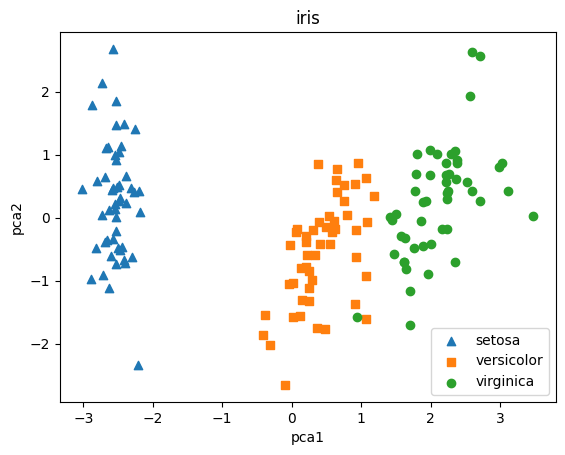

In [25]:
iris_df2 =pd.concat([iris_df,pd.DataFrame(iris_pca)], axis=1).rename(columns={0:'pca1', 1:'pca2'})

for i, marker in enumerate(['^', 's', 'o']):
    x_axis = iris_df2[iris_df2['target'] == i]['pca1']
    y_axis = iris_df2[iris_df2['target'] == i]['pca2']
    plt.scatter(x_axis, y_axis, marker=marker, label=load_iris()['target_names'][i])
plt.legend()
plt.title("iris")
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.show()

In [26]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [27]:
iris_df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pca1,pca2
0,5.1,3.5,1.4,0.2,0,-2.576120,0.474499
1,4.9,3.0,1.4,0.2,0,-2.415322,-0.678092
2,4.7,3.2,1.3,0.2,0,-2.659333,-0.348282
3,4.6,3.1,1.5,0.2,0,-2.601991,-0.603306
4,5.0,3.6,1.4,0.2,0,-2.683744,0.640220
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2.233024,0.389352
146,6.3,2.5,5.0,1.9,2,1.966862,-0.896264
147,6.5,3.0,5.2,2.0,2,1.928996,0.268890
148,6.2,3.4,5.4,2.3,2,1.806149,1.009217


In [ ]:
pca.explained_variance_
#전체 변동의 76프로가 변수 1에 들어있다. 
#변수 2에 나머지 18.2프로

array([3.8627697, 0.9202715])

In [29]:
pca.explained_variance_ratio_

array([0.76740358, 0.18282727])

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
rcf = RandomForestClassifier(random_state=42)

In [32]:
return_pca = cross_val_score(rcf,iris_df2[['pca1','pca2']], iris_df2['target'], scoring='accuracy', cv=3)

In [33]:
return_pca

array([0.98, 0.98, 1.  ])

In [20]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [24]:
# list of all features
path = "./data/human_activity-20250624T030820Z-1-001/human_activity"
x_train = pd.read_csv(path + '/train/X_train.txt', header=None, sep='\s+')
y_train = pd.read_csv(path + '/train/y_train.txt', header=None).rename(columns={0 :'target'})

x_test = pd.read_csv(path + '/test/X_test.txt', header=None, sep='\s+')
y_test = pd.read_csv(path + '/test/y_test.txt', header=None).rename(columns={0 :'target'})

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_46286/3761530053.py:3: SyntaxWarning: invalid escape sequence '\s'
  x_train = pd.read_csv(path + '/train/X_train.txt', header=None, sep='\s+')
/tmp/ipykernel_46286/3761530053.py:6: SyntaxWarning: invalid escape sequence '\s'
  x_test = pd.read_csv(path + '/test/X_test.txt', header=None, sep='\s+')


In [16]:
y_train.shape

(2947, 1)

In [25]:
pca_10 = PCA(n_components=10)
df_pca_10 = pca_10.fit_transform(x_train)

In [26]:
pca_10.explained_variance_ratio_.sum()

np.float64(0.8050387180555187)

In [27]:
rf = RandomForestClassifier(random_state=42)

In [28]:
rf.fit(df_pca_10, y_train)

/home/user1/miniconda3/envs/pandas/lib/python3.12/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
pca_10_test = pca_10.transform(x_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, rf.predict(pca_10_test))

0.8646080760095012

In [35]:
x_train.shape

(7352, 561)

In [36]:
y_train.shape

(7352, 1)

In [ ]:
    rf_origin = RandomForestClassifier(random_state=42)
    rf_origin.fit(x_train, y_train)
    accuracy_score(y_test, rf_origin.predict(x_test))

/home/user1/miniconda3/envs/pandas/lib/python3.12/site-packages/sklearn/base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9256871394638616

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

# list of all features
path = "./data/human_activity-20250624T030820Z-1-001/human_activity"
x_train = pd.read_csv(path + '/train/X_train.txt', header=None, sep='\s+')
y_train = pd.read_csv(path + '/train/y_train.txt', header=None).rename(columns={0 :'target'})

x_test = pd.read_csv(path + '/test/X_test.txt', header=None, sep='\s+')
y_test = pd.read_csv(path + '/test/y_test.txt', header=None).rename(columns={0 :'target'})

for x in [10, 15, 20,25,30,35,40,45,50]:
    pca_ = PCA(n_components=x)
    train_x_pca = pca_.fit_transform(x_train)
    rf_ = RandomForestClassifier(random_state=42)
    rf_.fit(train_x_pca, y_train)
    test_x_pca = pca_.transform(x_test)
    print(f"{x} -->>" ,end= " ")
    print(accuracy_score(y_test, rf_.predict(test_x_pca)))

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3159/2206681366.py:11: SyntaxWarning: invalid escape sequence '\s'
  x_train = pd.read_csv(path + '/train/X_train.txt', header=None, sep='\s+')
/tmp/ipykernel_3159/2206681366.py:14: SyntaxWarning: invalid escape sequence '\s'
  x_test = pd.read_csv(path + '/test/X_test.txt', header=None, sep='\s+')


10 -->> 0.8646080760095012
15 -->> 0.8788598574821853
20 -->> 0.8822531387852053
25 -->> 0.8900576857821514
30 -->> 0.8992195453003053


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# list of all features
path = "./data/human_activity-20250624T030820Z-1-001/human_activity"
x_train = pd.read_csv(path + '/train/X_train.txt', header=None, sep='\s+')
y_train = pd.read_csv(path + '/train/y_train.txt', header=None).rename(columns={0 :'target'})

x_test = pd.read_csv(path + '/test/X_test.txt', header=None, sep='\s+')
y_test = pd.read_csv(path + '/test/y_test.txt', header=None).rename(columns={0 :'target'})

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

for x in [10, 15, 20]:
    pca_ = PCA(n_components=x)
    train_x_pca = pca_.fit_transform(x_train)
    rf_ = RandomForestClassifier(random_state=42)
    rf_.fit(train_x_pca, y_train)
    test_x_pca = pca_.transform(x_test)
    print(f"{x} -->>" ,end= " ")
    print(accuracy_score(y_test, rf_.predict(test_x_pca)))

10 -->> 0.21241940956905328
15 -->> 0.22463522225992535
20 -->> 0.2544960977265015


In [2]:
x_train.shape

(7352, 561)

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# 데이터 경로
path = "./data/human_activity-20250624T030820Z-1-001/human_activity"

# 데이터 로드
x_train = pd.read_csv(path + '/train/X_train.txt', header=None, sep='\s+')
y_train = pd.read_csv(path + '/train/y_train.txt', header=None).rename(columns={0 :'target'})
x_test = pd.read_csv(path + '/test/X_test.txt', header=None, sep='\s+')
y_test = pd.read_csv(path + '/test/y_test.txt', header=None).rename(columns={0 :'target'})

# StandardScaler 적용
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)   # 학습 데이터로만 fit
x_test_scaled = scaler.transform(x_test)         # 테스트 데이터는 transform만

# PCA 및 RandomForestClassifier 적용
for x in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    pca_ = PCA(n_components=x)
    train_x_pca = pca_.fit_transform(x_train_scaled)
    rf_ = RandomForestClassifier(random_state=42)
    rf_.fit(train_x_pca, y_train.values.ravel())
    test_x_pca = pca_.transform(x_test_scaled)
    print(f"{x} -->>", accuracy_score(y_test, rf_.predict(test_x_pca)))


10 -->> 0.824906684764167
20 -->> 0.8557855446216491
30 -->> 0.8622327790973872
40 -->> 0.8741092636579573
50 -->> 0.8781812012215813
60 -->> 0.8744485917882593
70 -->> 0.8758059043094673
80 -->> 0.8805564981336953
90 -->> 0.8839497794367153
100 -->> 0.8791991856124872


In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

# list of all features
path = "./data/human_activity-20250624T030820Z-1-001/human_activity"
x_train = pd.read_csv(path + '/train/X_train.txt', header=None, sep='\s+')
y_train = pd.read_csv(path + '/train/y_train.txt', header=None).rename(columns={0 :'target'})

x_test = pd.read_csv(path + '/test/X_test.txt', header=None, sep='\s+')
y_test = pd.read_csv(path + '/test/y_test.txt', header=None).rename(columns={0 :'target'})

for x in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]:
    pca_ = PCA(n_components=x)
    train_x_pca = pca_.fit_transform(x_train)
    rf_ = RandomForestClassifier(random_state=42)
    rf_.fit(train_x_pca, y_train)
    test_x_pca = pca_.transform(x_test)
    print(f"{x} -->>" ,end= " ")
    print(accuracy_score(y_test, rf_.predict(test_x_pca)))

10 -->> 0.8646080760095012
20 -->> 0.8822531387852053
30 -->> 0.8992195453003053
40 -->> 0.9002375296912114
50 -->> 0.9019341703427214
60 -->> 0.9121140142517815
70 -->> 0.9080420766881574
80 -->> 0.9022734984730234
90 -->> 0.9090600610790635
100 -->> 0.9097387173396675
120 -->> 0.9100780454699695
140 -->> 0.9124533423820834
160 -->> 0.9124533423820834
180 -->> 0.9138106549032915
200 -->> 0.9083814048184594
220 -->> 0.9046487953851374
240 -->> 0.9056667797760435
260 -->> 0.9073634204275535
280 -->> 0.8968442483881914
300 -->> 0.9049881235154394


In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

# list of all features
path = "./data/human_activity-20250624T030820Z-1-001/human_activity"
x_train = pd.read_csv(path + '/train/X_train.txt', header=None, sep='\s+')
y_train = pd.read_csv(path + '/train/y_train.txt', header=None).rename(columns={0 :'target'})

x_test = pd.read_csv(path + '/test/X_test.txt', header=None, sep='\s+')
y_test = pd.read_csv(path + '/test/y_test.txt', header=None).rename(columns={0 :'target'})

for x in [300, 350, 400, 450, 500]:
    pca_ = PCA(n_components=x)
    train_x_pca = pca_.fit_transform(x_train)
    rf_ = RandomForestClassifier(random_state=42)
    rf_.fit(train_x_pca, y_train)
    test_x_pca = pca_.transform(x_test)
    print(f"{x} -->>" ,end= " ")
    print(accuracy_score(y_test, rf_.predict(test_x_pca)))

300 -->> 0.9049881235154394
350 -->> 0.9022734984730234
400 -->> 0.8893790295215473
450 -->> 0.8808958262639973
500 -->> 0.8798778418730913
